# EDA for pneumo dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import pydicom
import pandas as pd
from pneumo import mask_functions
import numpy as np


In [3]:
TRAIN_PATH = "/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/"

In [4]:
fns = glob.glob(os.path.join(TRAIN_PATH, "**/*.dcm"), recursive=True)
print(len(fns))

12089


## Inspect dcm metadata and join with mask data

In [5]:
train_df = pd.read_csv(os.path.join(TRAIN_PATH, '../train-rle.csv'))
display(train_df)

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...
2,1.2.276.0.7230010.3.1.4.8323329.11028.15178752...,-1
3,1.2.276.0.7230010.3.1.4.8323329.10366.15178752...,514175 10 1008 29 994 30 993 32 991 33 990 34 ...
4,1.2.276.0.7230010.3.1.4.8323329.10016.15178752...,592184 33 976 58 956 73 941 88 926 102 917 109...
...,...,...
12949,1.2.276.0.7230010.3.1.4.8323329.4070.151787518...,-1
12950,1.2.276.0.7230010.3.1.4.8323329.11296.15178752...,426110 2 1021 3 1020 4 1019 4 1019 5 1018 5 10...
12951,1.2.276.0.7230010.3.1.4.8323329.31695.15178751...,610404 7 1014 11 1012 13 1010 14 1009 16 1007 ...
12952,1.2.276.0.7230010.3.1.4.8323329.1853.151787516...,-1


In [ ]:
meta = []

count =0 
for fn in fns:
    sample = pydicom.dcmread(fn)
    data = {i.description(): i.value for i in sample if not "Pixel Data" in i.description()}
    data["fn"] = fn
    data["rle_mask"] = train_df[train_df["ImageId"]==data["SOP Instance UID"]]["EncodedPixels"].values
    meta.append(data)

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14122.1517875249.721466/1.2.276.0.7230010.3.1.3.8323329.14122.1517875249.721465/1.2.276.0.7230010.3.1.4.8323329.14122.1517875249.721467.dcm
1.2.276.0.7230010.3.1.3.8323329.14122.1517875249.721465
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5009.1517875185.946300/1.2.276.0.7230010.3.1.3.8323329.5009.1517875185.946299/1.2.276.0.7230010.3.1.4.8323329.5009.1517875185.946301.dcm
1.2.276.0.7230010.3.1.3.8323329.5009.1517875185.946299
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6794.1517875201.199438/1.2.276.0.7230010.3.1.3.8323329.6794.1517875201.199437/1.2.276.0.7230010.3.1.4.8323329.6794.1517875201.199439.dcm
1.2.276.0.7230010.3.1.3.8323329.6794.1517875201.199437
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32540.1517875161.100153/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4950.1517875185.642662/1.2.276.0.7230010.3.1.3.8323329.4950.1517875185.642661/1.2.276.0.7230010.3.1.4.8323329.4950.1517875185.642663.dcm
1.2.276.0.7230010.3.1.3.8323329.4950.1517875185.642661
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4055.1517875180.891260/1.2.276.0.7230010.3.1.3.8323329.4055.1517875180.891259/1.2.276.0.7230010.3.1.4.8323329.4055.1517875180.891261.dcm
1.2.276.0.7230010.3.1.3.8323329.4055.1517875180.891259
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5065.1517875186.248524/1.2.276.0.7230010.3.1.3.8323329.5065.1517875186.248523/1.2.276.0.7230010.3.1.4.8323329.5065.1517875186.248525.dcm
1.2.276.0.7230010.3.1.3.8323329.5065.1517875186.248523
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14570.1517875252.754463/1.2.276.0.7230010.3.1.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11388.1517875232.728252/1.2.276.0.7230010.3.1.3.8323329.11388.1517875232.728251/1.2.276.0.7230010.3.1.4.8323329.11388.1517875232.728253.dcm
1.2.276.0.7230010.3.1.3.8323329.11388.1517875232.728251
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10472.1517875223.864248/1.2.276.0.7230010.3.1.3.8323329.10472.1517875223.864247/1.2.276.0.7230010.3.1.4.8323329.10472.1517875223.864249.dcm
1.2.276.0.7230010.3.1.3.8323329.10472.1517875223.864247
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6614.1517875199.211709/1.2.276.0.7230010.3.1.3.8323329.6614.1517875199.211708/1.2.276.0.7230010.3.1.4.8323329.6614.1517875199.211710.dcm
1.2.276.0.7230010.3.1.3.8323329.6614.1517875199.211708
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13111.1517875243.680617/1.2.276.0.723001

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.349.1517875162.510498/1.2.276.0.7230010.3.1.3.8323329.349.1517875162.510497/1.2.276.0.7230010.3.1.4.8323329.349.1517875162.510499.dcm
1.2.276.0.7230010.3.1.3.8323329.349.1517875162.510497
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4133.1517875181.272104/1.2.276.0.7230010.3.1.3.8323329.4133.1517875181.272103/1.2.276.0.7230010.3.1.4.8323329.4133.1517875181.272105.dcm
1.2.276.0.7230010.3.1.3.8323329.4133.1517875181.272103
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12973.1517875242.807181/1.2.276.0.7230010.3.1.3.8323329.12973.1517875242.807180/1.2.276.0.7230010.3.1.4.8323329.12973.1517875242.807182.dcm
1.2.276.0.7230010.3.1.3.8323329.12973.1517875242.807180
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31880.1517875157.295919/1.2.276.0.7230010.3.1.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13473.1517875245.488116/1.2.276.0.7230010.3.1.3.8323329.13473.1517875245.488115/1.2.276.0.7230010.3.1.4.8323329.13473.1517875245.488117.dcm
1.2.276.0.7230010.3.1.3.8323329.13473.1517875245.488115
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5891.1517875192.271623/1.2.276.0.7230010.3.1.3.8323329.5891.1517875192.271622/1.2.276.0.7230010.3.1.4.8323329.5891.1517875192.271624.dcm
1.2.276.0.7230010.3.1.3.8323329.5891.1517875192.271622
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5109.1517875186.450604/1.2.276.0.7230010.3.1.3.8323329.5109.1517875186.450603/1.2.276.0.7230010.3.1.4.8323329.5109.1517875186.450605.dcm
1.2.276.0.7230010.3.1.3.8323329.5109.1517875186.450603
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4223.1517875181.791211/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3000.1517875175.622259/1.2.276.0.7230010.3.1.3.8323329.3000.1517875175.622258/1.2.276.0.7230010.3.1.4.8323329.3000.1517875175.622260.dcm
1.2.276.0.7230010.3.1.3.8323329.3000.1517875175.622258
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.21631.1517874435.266170/1.2.276.0.7230010.3.1.3.8323329.21631.1517874435.266169/1.2.276.0.7230010.3.1.4.8323329.21631.1517874435.266171.dcm
1.2.276.0.7230010.3.1.3.8323329.21631.1517874435.266169
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2559.1517875173.405558/1.2.276.0.7230010.3.1.3.8323329.2559.1517875173.405557/1.2.276.0.7230010.3.1.4.8323329.2559.1517875173.405559.dcm
1.2.276.0.7230010.3.1.3.8323329.2559.1517875173.405557
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5689.1517875189.590993/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12164.1517875237.801120/1.2.276.0.7230010.3.1.3.8323329.12164.1517875237.801119/1.2.276.0.7230010.3.1.4.8323329.12164.1517875237.801121.dcm
1.2.276.0.7230010.3.1.3.8323329.12164.1517875237.801119
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6081.1517875196.408459/1.2.276.0.7230010.3.1.3.8323329.6081.1517875196.408458/1.2.276.0.7230010.3.1.4.8323329.6081.1517875196.408460.dcm
1.2.276.0.7230010.3.1.3.8323329.6081.1517875196.408458
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12355.1517875238.747382/1.2.276.0.7230010.3.1.3.8323329.12355.1517875238.747381/1.2.276.0.7230010.3.1.4.8323329.12355.1517875238.747383.dcm
1.2.276.0.7230010.3.1.3.8323329.12355.1517875238.747381
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12550.1517875239.666284/1.2.276.0.723001

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11650.1517875234.121114/1.2.276.0.7230010.3.1.3.8323329.11650.1517875234.121113/1.2.276.0.7230010.3.1.4.8323329.11650.1517875234.121115.dcm
1.2.276.0.7230010.3.1.3.8323329.11650.1517875234.121113
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2883.1517875175.209993/1.2.276.0.7230010.3.1.3.8323329.2883.1517875175.209992/1.2.276.0.7230010.3.1.4.8323329.2883.1517875175.209994.dcm
1.2.276.0.7230010.3.1.3.8323329.2883.1517875175.209992
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1316.1517875167.222424/1.2.276.0.7230010.3.1.3.8323329.1316.1517875167.222423/1.2.276.0.7230010.3.1.4.8323329.1316.1517875167.222425.dcm
1.2.276.0.7230010.3.1.3.8323329.1316.1517875167.222423
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4833.1517875185.33575/1.2.276.0.7230010.3.1.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3175.1517875176.443626/1.2.276.0.7230010.3.1.3.8323329.3175.1517875176.443625/1.2.276.0.7230010.3.1.4.8323329.3175.1517875176.443627.dcm
1.2.276.0.7230010.3.1.3.8323329.3175.1517875176.443625
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10301.1517875223.41206/1.2.276.0.7230010.3.1.3.8323329.10301.1517875223.41205/1.2.276.0.7230010.3.1.4.8323329.10301.1517875223.41207.dcm
1.2.276.0.7230010.3.1.3.8323329.10301.1517875223.41205
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31841.1517875157.97023/1.2.276.0.7230010.3.1.3.8323329.31841.1517875157.97022/1.2.276.0.7230010.3.1.4.8323329.31841.1517875157.97024.dcm
1.2.276.0.7230010.3.1.3.8323329.31841.1517875157.97022
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3517.1517875178.191501/1.2.276.0.7230010.3.1.3.8

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11616.1517875233.921890/1.2.276.0.7230010.3.1.3.8323329.11616.1517875233.921889/1.2.276.0.7230010.3.1.4.8323329.11616.1517875233.921891.dcm
1.2.276.0.7230010.3.1.3.8323329.11616.1517875233.921889
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1922.1517875170.258102/1.2.276.0.7230010.3.1.3.8323329.1922.1517875170.258101/1.2.276.0.7230010.3.1.4.8323329.1922.1517875170.258103.dcm
1.2.276.0.7230010.3.1.3.8323329.1922.1517875170.258101
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5349.1517875187.713373/1.2.276.0.7230010.3.1.3.8323329.5349.1517875187.713372/1.2.276.0.7230010.3.1.4.8323329.5349.1517875187.713374.dcm
1.2.276.0.7230010.3.1.3.8323329.5349.1517875187.713372
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32577.1517875161.295479/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4873.1517875185.188521/1.2.276.0.7230010.3.1.3.8323329.4873.1517875185.188520/1.2.276.0.7230010.3.1.4.8323329.4873.1517875185.188522.dcm
1.2.276.0.7230010.3.1.3.8323329.4873.1517875185.188520
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32283.1517875159.393349/1.2.276.0.7230010.3.1.3.8323329.32283.1517875159.393348/1.2.276.0.7230010.3.1.4.8323329.32283.1517875159.393350.dcm
1.2.276.0.7230010.3.1.3.8323329.32283.1517875159.393348
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.334.1517875162.431426/1.2.276.0.7230010.3.1.3.8323329.334.1517875162.431425/1.2.276.0.7230010.3.1.4.8323329.334.1517875162.431427.dcm
1.2.276.0.7230010.3.1.3.8323329.334.1517875162.431425
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5053.1517875186.153241/1.2.276.0.7230010.3.1.3.8

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5665.1517875189.395931/1.2.276.0.7230010.3.1.3.8323329.5665.1517875189.395930/1.2.276.0.7230010.3.1.4.8323329.5665.1517875189.395932.dcm
1.2.276.0.7230010.3.1.3.8323329.5665.1517875189.395930
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3129.1517875176.240638/1.2.276.0.7230010.3.1.3.8323329.3129.1517875176.240637/1.2.276.0.7230010.3.1.4.8323329.3129.1517875176.240639.dcm
1.2.276.0.7230010.3.1.3.8323329.3129.1517875176.240637
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2093.1517875171.146193/1.2.276.0.7230010.3.1.3.8323329.2093.1517875171.146192/1.2.276.0.7230010.3.1.4.8323329.2093.1517875171.146194.dcm
1.2.276.0.7230010.3.1.3.8323329.2093.1517875171.146192
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10493.1517875223.945576/1.2.276.0.7230010.3.1.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6109.1517875196.574623/1.2.276.0.7230010.3.1.3.8323329.6109.1517875196.574622/1.2.276.0.7230010.3.1.4.8323329.6109.1517875196.574624.dcm
1.2.276.0.7230010.3.1.3.8323329.6109.1517875196.574622
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2757.1517875174.577694/1.2.276.0.7230010.3.1.3.8323329.2757.1517875174.577693/1.2.276.0.7230010.3.1.4.8323329.2757.1517875174.577695.dcm
1.2.276.0.7230010.3.1.3.8323329.2757.1517875174.577693
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2836.1517875174.995787/1.2.276.0.7230010.3.1.3.8323329.2836.1517875174.995786/1.2.276.0.7230010.3.1.4.8323329.2836.1517875174.995788.dcm
1.2.276.0.7230010.3.1.3.8323329.2836.1517875174.995786
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32507.1517875160.922366/1.2.276.0.7230010.3.1.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13467.1517875245.465060/1.2.276.0.7230010.3.1.3.8323329.13467.1517875245.465059/1.2.276.0.7230010.3.1.4.8323329.13467.1517875245.465061.dcm
1.2.276.0.7230010.3.1.3.8323329.13467.1517875245.465059
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5688.1517875189.621601/1.2.276.0.7230010.3.1.3.8323329.5688.1517875189.621600/1.2.276.0.7230010.3.1.4.8323329.5688.1517875189.621602.dcm
1.2.276.0.7230010.3.1.3.8323329.5688.1517875189.621600
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11781.1517875234.774592/1.2.276.0.7230010.3.1.3.8323329.11781.1517875234.774591/1.2.276.0.7230010.3.1.4.8323329.11781.1517875234.774593.dcm
1.2.276.0.7230010.3.1.3.8323329.11781.1517875234.774591
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12118.1517875237.465518/1.2.276.0.723001

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10674.1517875224.997552/1.2.276.0.7230010.3.1.3.8323329.10674.1517875224.997551/1.2.276.0.7230010.3.1.4.8323329.10674.1517875224.997553.dcm
1.2.276.0.7230010.3.1.3.8323329.10674.1517875224.997551
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4313.1517875182.236131/1.2.276.0.7230010.3.1.3.8323329.4313.1517875182.236130/1.2.276.0.7230010.3.1.4.8323329.4313.1517875182.236132.dcm
1.2.276.0.7230010.3.1.3.8323329.4313.1517875182.236130
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6902.1517875201.857896/1.2.276.0.7230010.3.1.3.8323329.6902.1517875201.857895/1.2.276.0.7230010.3.1.4.8323329.6902.1517875201.857897.dcm
1.2.276.0.7230010.3.1.3.8323329.6902.1517875201.857895
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5819.1517875191.247063/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1209.1517875166.788483/1.2.276.0.7230010.3.1.3.8323329.1209.1517875166.788482/1.2.276.0.7230010.3.1.4.8323329.1209.1517875166.788484.dcm
1.2.276.0.7230010.3.1.3.8323329.1209.1517875166.788482
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2527.1517875173.208560/1.2.276.0.7230010.3.1.3.8323329.2527.1517875173.208559/1.2.276.0.7230010.3.1.4.8323329.2527.1517875173.208561.dcm
1.2.276.0.7230010.3.1.3.8323329.2527.1517875173.208559
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32141.1517875158.654187/1.2.276.0.7230010.3.1.3.8323329.32141.1517875158.654186/1.2.276.0.7230010.3.1.4.8323329.32141.1517875158.654188.dcm
1.2.276.0.7230010.3.1.3.8323329.32141.1517875158.654186
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10577.1517875224.378911/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13832.1517875248.179242/1.2.276.0.7230010.3.1.3.8323329.13832.1517875248.179241/1.2.276.0.7230010.3.1.4.8323329.13832.1517875248.179243.dcm
1.2.276.0.7230010.3.1.3.8323329.13832.1517875248.179241
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12819.1517875241.996303/1.2.276.0.7230010.3.1.3.8323329.12819.1517875241.996302/1.2.276.0.7230010.3.1.4.8323329.12819.1517875241.996304.dcm
1.2.276.0.7230010.3.1.3.8323329.12819.1517875241.996302
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13397.1517875245.126272/1.2.276.0.7230010.3.1.3.8323329.13397.1517875245.126271/1.2.276.0.7230010.3.1.4.8323329.13397.1517875245.126273.dcm
1.2.276.0.7230010.3.1.3.8323329.13397.1517875245.126271
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1407.1517875167.596213/1.2.276.0.723

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2742.1517875174.392581/1.2.276.0.7230010.3.1.3.8323329.2742.1517875174.392580/1.2.276.0.7230010.3.1.4.8323329.2742.1517875174.392582.dcm
1.2.276.0.7230010.3.1.3.8323329.2742.1517875174.392580
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6845.1517875201.507399/1.2.276.0.7230010.3.1.3.8323329.6845.1517875201.507398/1.2.276.0.7230010.3.1.4.8323329.6845.1517875201.507400.dcm
1.2.276.0.7230010.3.1.3.8323329.6845.1517875201.507398
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31911.1517875157.458445/1.2.276.0.7230010.3.1.3.8323329.31911.1517875157.458444/1.2.276.0.7230010.3.1.4.8323329.31911.1517875157.458446.dcm
1.2.276.0.7230010.3.1.3.8323329.31911.1517875157.458444
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6993.1517875202.254439/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32753.1517875162.170352/1.2.276.0.7230010.3.1.3.8323329.32753.1517875162.170351/1.2.276.0.7230010.3.1.4.8323329.32753.1517875162.170353.dcm
1.2.276.0.7230010.3.1.3.8323329.32753.1517875162.170351
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1823.1517875169.745070/1.2.276.0.7230010.3.1.3.8323329.1823.1517875169.745069/1.2.276.0.7230010.3.1.4.8323329.1823.1517875169.745071.dcm
1.2.276.0.7230010.3.1.3.8323329.1823.1517875169.745069
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6950.1517875202.75839/1.2.276.0.7230010.3.1.3.8323329.6950.1517875202.75838/1.2.276.0.7230010.3.1.4.8323329.6950.1517875202.75840.dcm
1.2.276.0.7230010.3.1.3.8323329.6950.1517875202.75838
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2342.1517875172.263950/1.2.276.0.7230010.3.1.3.8

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.320.1517875162.379958/1.2.276.0.7230010.3.1.3.8323329.320.1517875162.379957/1.2.276.0.7230010.3.1.4.8323329.320.1517875162.379959.dcm
1.2.276.0.7230010.3.1.3.8323329.320.1517875162.379957
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13270.1517875244.435288/1.2.276.0.7230010.3.1.3.8323329.13270.1517875244.435287/1.2.276.0.7230010.3.1.4.8323329.13270.1517875244.435289.dcm
1.2.276.0.7230010.3.1.3.8323329.13270.1517875244.435287
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6452.1517875198.299462/1.2.276.0.7230010.3.1.3.8323329.6452.1517875198.299461/1.2.276.0.7230010.3.1.4.8323329.6452.1517875198.299463.dcm
1.2.276.0.7230010.3.1.3.8323329.6452.1517875198.299461
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10724.1517875225.304991/1.2.276.0.7230010.3.1.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11811.1517875235.149038/1.2.276.0.7230010.3.1.3.8323329.11811.1517875235.149037/1.2.276.0.7230010.3.1.4.8323329.11811.1517875235.149039.dcm
1.2.276.0.7230010.3.1.3.8323329.11811.1517875235.149037
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12292.1517875238.407966/1.2.276.0.7230010.3.1.3.8323329.12292.1517875238.407965/1.2.276.0.7230010.3.1.4.8323329.12292.1517875238.407967.dcm
1.2.276.0.7230010.3.1.3.8323329.12292.1517875238.407965
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31971.1517875157.779374/1.2.276.0.7230010.3.1.3.8323329.31971.1517875157.779373/1.2.276.0.7230010.3.1.4.8323329.31971.1517875157.779375.dcm
1.2.276.0.7230010.3.1.3.8323329.31971.1517875157.779373
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10556.1517875224.254883/1.2.276.0.72

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12979.1517875242.846654/1.2.276.0.7230010.3.1.3.8323329.12979.1517875242.846653/1.2.276.0.7230010.3.1.4.8323329.12979.1517875242.846655.dcm
1.2.276.0.7230010.3.1.3.8323329.12979.1517875242.846653
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3686.1517875178.975133/1.2.276.0.7230010.3.1.3.8323329.3686.1517875178.975132/1.2.276.0.7230010.3.1.4.8323329.3686.1517875178.975134.dcm
1.2.276.0.7230010.3.1.3.8323329.3686.1517875178.975132
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10165.1517875222.438187/1.2.276.0.7230010.3.1.3.8323329.10165.1517875222.438186/1.2.276.0.7230010.3.1.4.8323329.10165.1517875222.438188.dcm
1.2.276.0.7230010.3.1.3.8323329.10165.1517875222.438186
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14507.1517875252.440676/1.2.276.0.723001

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5867.1517875191.895142/1.2.276.0.7230010.3.1.3.8323329.5867.1517875191.895141/1.2.276.0.7230010.3.1.4.8323329.5867.1517875191.895143.dcm
1.2.276.0.7230010.3.1.3.8323329.5867.1517875191.895141
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13102.1517875243.606086/1.2.276.0.7230010.3.1.3.8323329.13102.1517875243.606085/1.2.276.0.7230010.3.1.4.8323329.13102.1517875243.606087.dcm
1.2.276.0.7230010.3.1.3.8323329.13102.1517875243.606085
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.689.1517875164.84124/1.2.276.0.7230010.3.1.3.8323329.689.1517875164.84123/1.2.276.0.7230010.3.1.4.8323329.689.1517875164.84125.dcm
1.2.276.0.7230010.3.1.3.8323329.689.1517875164.84123
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11387.1517875232.737591/1.2.276.0.7230010.3.1.3.8323

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6370.1517875197.841735/1.2.276.0.7230010.3.1.3.8323329.6370.1517875197.841734/1.2.276.0.7230010.3.1.4.8323329.6370.1517875197.841736.dcm
1.2.276.0.7230010.3.1.3.8323329.6370.1517875197.841734
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11838.1517875235.971158/1.2.276.0.7230010.3.1.3.8323329.11838.1517875235.971157/1.2.276.0.7230010.3.1.4.8323329.11838.1517875235.971159.dcm
1.2.276.0.7230010.3.1.3.8323329.11838.1517875235.971157
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3362.1517875177.486288/1.2.276.0.7230010.3.1.3.8323329.3362.1517875177.486287/1.2.276.0.7230010.3.1.4.8323329.3362.1517875177.486289.dcm
1.2.276.0.7230010.3.1.3.8323329.3362.1517875177.486287
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31727.1517875156.500532/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14003.1517875249.81747/1.2.276.0.7230010.3.1.3.8323329.14003.1517875249.81746/1.2.276.0.7230010.3.1.4.8323329.14003.1517875249.81748.dcm
1.2.276.0.7230010.3.1.3.8323329.14003.1517875249.81746
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32708.1517875161.904663/1.2.276.0.7230010.3.1.3.8323329.32708.1517875161.904662/1.2.276.0.7230010.3.1.4.8323329.32708.1517875161.904664.dcm
1.2.276.0.7230010.3.1.3.8323329.32708.1517875161.904662
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32337.1517875160.100966/1.2.276.0.7230010.3.1.3.8323329.32337.1517875160.100965/1.2.276.0.7230010.3.1.4.8323329.32337.1517875160.100967.dcm
1.2.276.0.7230010.3.1.3.8323329.32337.1517875160.100965
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6497.1517875198.600388/1.2.276.0.7230010

1.2.276.0.7230010.3.1.3.8323329.1248.1517875166.953778
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12097.1517875237.372855/1.2.276.0.7230010.3.1.3.8323329.12097.1517875237.372854/1.2.276.0.7230010.3.1.4.8323329.12097.1517875237.372856.dcm
1.2.276.0.7230010.3.1.3.8323329.12097.1517875237.372854
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13958.1517875248.843046/1.2.276.0.7230010.3.1.3.8323329.13958.1517875248.843045/1.2.276.0.7230010.3.1.4.8323329.13958.1517875248.843047.dcm
1.2.276.0.7230010.3.1.3.8323329.13958.1517875248.843045
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14447.1517875252.155940/1.2.276.0.7230010.3.1.3.8323329.14447.1517875252.155939/1.2.276.0.7230010.3.1.4.8323329.14447.1517875252.155941.dcm
1.2.276.0.7230010.3.1.3.8323329.14447.1517875252.155939
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.723

1.2.276.0.7230010.3.1.3.8323329.12278.1517875238.352107
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4054.1517875180.882185/1.2.276.0.7230010.3.1.3.8323329.4054.1517875180.882184/1.2.276.0.7230010.3.1.4.8323329.4054.1517875180.882186.dcm
1.2.276.0.7230010.3.1.3.8323329.4054.1517875180.882184
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13671.1517875247.141783/1.2.276.0.7230010.3.1.3.8323329.13671.1517875247.141782/1.2.276.0.7230010.3.1.4.8323329.13671.1517875247.141784.dcm
1.2.276.0.7230010.3.1.3.8323329.13671.1517875247.141782
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3332.1517875177.296676/1.2.276.0.7230010.3.1.3.8323329.3332.1517875177.296675/1.2.276.0.7230010.3.1.4.8323329.3332.1517875177.296677.dcm
1.2.276.0.7230010.3.1.3.8323329.3332.1517875177.296675
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3560.1517875178.425405/1.2.276.0.7230010.3.1.3.8323329.3560.1517875178.425404/1.2.276.0.7230010.3.1.4.8323329.3560.1517875178.425406.dcm
1.2.276.0.7230010.3.1.3.8323329.3560.1517875178.425404
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1787.1517875169.432106/1.2.276.0.7230010.3.1.3.8323329.1787.1517875169.432105/1.2.276.0.7230010.3.1.4.8323329.1787.1517875169.432107.dcm
1.2.276.0.7230010.3.1.3.8323329.1787.1517875169.432105
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.588.1517875163.573522/1.2.276.0.7230010.3.1.3.8323329.588.1517875163.573521/1.2.276.0.7230010.3.1.4.8323329.588.1517875163.573523.dcm
1.2.276.0.7230010.3.1.3.8323329.588.1517875163.573521
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3532.1517875178.263209/1.2.276.0.7230010.3.1.3.83233

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3626.1517875178.720626/1.2.276.0.7230010.3.1.3.8323329.3626.1517875178.720625/1.2.276.0.7230010.3.1.4.8323329.3626.1517875178.720627.dcm
1.2.276.0.7230010.3.1.3.8323329.3626.1517875178.720625
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3158.1517875176.372795/1.2.276.0.7230010.3.1.3.8323329.3158.1517875176.372794/1.2.276.0.7230010.3.1.4.8323329.3158.1517875176.372796.dcm
1.2.276.0.7230010.3.1.3.8323329.3158.1517875176.372794
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10854.1517875225.968979/1.2.276.0.7230010.3.1.3.8323329.10854.1517875225.968978/1.2.276.0.7230010.3.1.4.8323329.10854.1517875225.968980.dcm
1.2.276.0.7230010.3.1.3.8323329.10854.1517875225.968978
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3804.1517875179.572984/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11229.1517875231.823684/1.2.276.0.7230010.3.1.3.8323329.11229.1517875231.823683/1.2.276.0.7230010.3.1.4.8323329.11229.1517875231.823685.dcm
1.2.276.0.7230010.3.1.3.8323329.11229.1517875231.823683
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31760.1517875156.679507/1.2.276.0.7230010.3.1.3.8323329.31760.1517875156.679506/1.2.276.0.7230010.3.1.4.8323329.31760.1517875156.679508.dcm
1.2.276.0.7230010.3.1.3.8323329.31760.1517875156.679506
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2386.1517875172.487818/1.2.276.0.7230010.3.1.3.8323329.2386.1517875172.487817/1.2.276.0.7230010.3.1.4.8323329.2386.1517875172.487819.dcm
1.2.276.0.7230010.3.1.3.8323329.2386.1517875172.487817
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11518.1517875233.314478/1.2.276.0.723001

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6456.1517875198.328309/1.2.276.0.7230010.3.1.3.8323329.6456.1517875198.328308/1.2.276.0.7230010.3.1.4.8323329.6456.1517875198.328310.dcm
1.2.276.0.7230010.3.1.3.8323329.6456.1517875198.328308
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3475.1517875178.11261/1.2.276.0.7230010.3.1.3.8323329.3475.1517875178.11260/1.2.276.0.7230010.3.1.4.8323329.3475.1517875178.11262.dcm
1.2.276.0.7230010.3.1.3.8323329.3475.1517875178.11260
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11630.1517875234.4285/1.2.276.0.7230010.3.1.3.8323329.11630.1517875234.4284/1.2.276.0.7230010.3.1.4.8323329.11630.1517875234.4286.dcm
1.2.276.0.7230010.3.1.3.8323329.11630.1517875234.4284
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3910.1517875180.91473/1.2.276.0.7230010.3.1.3.8323329.39

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4235.1517875181.847858/1.2.276.0.7230010.3.1.3.8323329.4235.1517875181.847857/1.2.276.0.7230010.3.1.4.8323329.4235.1517875181.847859.dcm
1.2.276.0.7230010.3.1.3.8323329.4235.1517875181.847857
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11668.1517875234.227948/1.2.276.0.7230010.3.1.3.8323329.11668.1517875234.227947/1.2.276.0.7230010.3.1.4.8323329.11668.1517875234.227949.dcm
1.2.276.0.7230010.3.1.3.8323329.11668.1517875234.227947
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12137.1517875237.612323/1.2.276.0.7230010.3.1.3.8323329.12137.1517875237.612322/1.2.276.0.7230010.3.1.4.8323329.12137.1517875237.612324.dcm
1.2.276.0.7230010.3.1.3.8323329.12137.1517875237.612322
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14161.1517875249.924025/1.2.276.0.723001

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6312.1517875197.557648/1.2.276.0.7230010.3.1.3.8323329.6312.1517875197.557647/1.2.276.0.7230010.3.1.4.8323329.6312.1517875197.557649.dcm
1.2.276.0.7230010.3.1.3.8323329.6312.1517875197.557647
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.7046.1517875202.494783/1.2.276.0.7230010.3.1.3.8323329.7046.1517875202.494782/1.2.276.0.7230010.3.1.4.8323329.7046.1517875202.494784.dcm
1.2.276.0.7230010.3.1.3.8323329.7046.1517875202.494782
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4189.1517875181.586735/1.2.276.0.7230010.3.1.3.8323329.4189.1517875181.586734/1.2.276.0.7230010.3.1.4.8323329.4189.1517875181.586736.dcm
1.2.276.0.7230010.3.1.3.8323329.4189.1517875181.586734
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4407.1517875182.689617/1.2.276.0.7230010.3.1.3.8

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6810.1517875201.300233/1.2.276.0.7230010.3.1.3.8323329.6810.1517875201.300232/1.2.276.0.7230010.3.1.4.8323329.6810.1517875201.300234.dcm
1.2.276.0.7230010.3.1.3.8323329.6810.1517875201.300232
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2579.1517875173.586380/1.2.276.0.7230010.3.1.3.8323329.2579.1517875173.586379/1.2.276.0.7230010.3.1.4.8323329.2579.1517875173.586381.dcm
1.2.276.0.7230010.3.1.3.8323329.2579.1517875173.586379
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13155.1517875243.920326/1.2.276.0.7230010.3.1.3.8323329.13155.1517875243.920325/1.2.276.0.7230010.3.1.4.8323329.13155.1517875243.920327.dcm
1.2.276.0.7230010.3.1.3.8323329.13155.1517875243.920325
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14356.1517875251.713580/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10068.1517875221.829411/1.2.276.0.7230010.3.1.3.8323329.10068.1517875221.829410/1.2.276.0.7230010.3.1.4.8323329.10068.1517875221.829412.dcm
1.2.276.0.7230010.3.1.3.8323329.10068.1517875221.829410
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11055.1517875230.475220/1.2.276.0.7230010.3.1.3.8323329.11055.1517875230.475219/1.2.276.0.7230010.3.1.4.8323329.11055.1517875230.475221.dcm
1.2.276.0.7230010.3.1.3.8323329.11055.1517875230.475219
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4835.1517875185.49659/1.2.276.0.7230010.3.1.3.8323329.4835.1517875185.49658/1.2.276.0.7230010.3.1.4.8323329.4835.1517875185.49660.dcm
1.2.276.0.7230010.3.1.3.8323329.4835.1517875185.49658
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6357.1517875197.797270/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13954.1517875248.825120/1.2.276.0.7230010.3.1.3.8323329.13954.1517875248.825119/1.2.276.0.7230010.3.1.4.8323329.13954.1517875248.825121.dcm
1.2.276.0.7230010.3.1.3.8323329.13954.1517875248.825119
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12293.1517875238.412246/1.2.276.0.7230010.3.1.3.8323329.12293.1517875238.412245/1.2.276.0.7230010.3.1.4.8323329.12293.1517875238.412247.dcm
1.2.276.0.7230010.3.1.3.8323329.12293.1517875238.412245
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13725.1517875247.405192/1.2.276.0.7230010.3.1.3.8323329.13725.1517875247.405191/1.2.276.0.7230010.3.1.4.8323329.13725.1517875247.405193.dcm
1.2.276.0.7230010.3.1.3.8323329.13725.1517875247.405191
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11530.1517875233.415422/1.2.276.0.72

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5603.1517875188.985220/1.2.276.0.7230010.3.1.3.8323329.5603.1517875188.985219/1.2.276.0.7230010.3.1.4.8323329.5603.1517875188.985221.dcm
1.2.276.0.7230010.3.1.3.8323329.5603.1517875188.985219
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14031.1517875249.233467/1.2.276.0.7230010.3.1.3.8323329.14031.1517875249.233466/1.2.276.0.7230010.3.1.4.8323329.14031.1517875249.233468.dcm
1.2.276.0.7230010.3.1.3.8323329.14031.1517875249.233466
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13012.1517875243.64773/1.2.276.0.7230010.3.1.3.8323329.13012.1517875243.64772/1.2.276.0.7230010.3.1.4.8323329.13012.1517875243.64774.dcm
1.2.276.0.7230010.3.1.3.8323329.13012.1517875243.64772
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10544.1517875224.213809/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31650.1517875156.50389/1.2.276.0.7230010.3.1.3.8323329.31650.1517875156.50388/1.2.276.0.7230010.3.1.4.8323329.31650.1517875156.50390.dcm
1.2.276.0.7230010.3.1.3.8323329.31650.1517875156.50388
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1887.1517875170.118094/1.2.276.0.7230010.3.1.3.8323329.1887.1517875170.118093/1.2.276.0.7230010.3.1.4.8323329.1887.1517875170.118095.dcm
1.2.276.0.7230010.3.1.3.8323329.1887.1517875170.118093
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12327.1517875238.597820/1.2.276.0.7230010.3.1.3.8323329.12327.1517875238.597819/1.2.276.0.7230010.3.1.4.8323329.12327.1517875238.597821.dcm
1.2.276.0.7230010.3.1.3.8323329.12327.1517875238.597819
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12245.1517875238.183846/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2806.1517875174.823574/1.2.276.0.7230010.3.1.3.8323329.2806.1517875174.823573/1.2.276.0.7230010.3.1.4.8323329.2806.1517875174.823575.dcm
1.2.276.0.7230010.3.1.3.8323329.2806.1517875174.823573
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10322.1517875223.142883/1.2.276.0.7230010.3.1.3.8323329.10322.1517875223.142882/1.2.276.0.7230010.3.1.4.8323329.10322.1517875223.142884.dcm
1.2.276.0.7230010.3.1.3.8323329.10322.1517875223.142882
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3678.1517875178.953519/1.2.276.0.7230010.3.1.3.8323329.3678.1517875178.953518/1.2.276.0.7230010.3.1.4.8323329.3678.1517875178.953520.dcm
1.2.276.0.7230010.3.1.3.8323329.3678.1517875178.953518
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6146.1517875196.740092/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3595.1517875178.623514/1.2.276.0.7230010.3.1.3.8323329.3595.1517875178.623513/1.2.276.0.7230010.3.1.4.8323329.3595.1517875178.623515.dcm
1.2.276.0.7230010.3.1.3.8323329.3595.1517875178.623513
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10446.1517875223.762751/1.2.276.0.7230010.3.1.3.8323329.10446.1517875223.762750/1.2.276.0.7230010.3.1.4.8323329.10446.1517875223.762752.dcm
1.2.276.0.7230010.3.1.3.8323329.10446.1517875223.762750
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4645.1517875183.957367/1.2.276.0.7230010.3.1.3.8323329.4645.1517875183.957366/1.2.276.0.7230010.3.1.4.8323329.4645.1517875183.957368.dcm
1.2.276.0.7230010.3.1.3.8323329.4645.1517875183.957366
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5254.1517875187.192312/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5125.1517875186.535280/1.2.276.0.7230010.3.1.3.8323329.5125.1517875186.535279/1.2.276.0.7230010.3.1.4.8323329.5125.1517875186.535281.dcm
1.2.276.0.7230010.3.1.3.8323329.5125.1517875186.535279
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5117.1517875186.478702/1.2.276.0.7230010.3.1.3.8323329.5117.1517875186.478701/1.2.276.0.7230010.3.1.4.8323329.5117.1517875186.478703.dcm
1.2.276.0.7230010.3.1.3.8323329.5117.1517875186.478701
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11434.1517875232.918009/1.2.276.0.7230010.3.1.3.8323329.11434.1517875232.918008/1.2.276.0.7230010.3.1.4.8323329.11434.1517875232.918010.dcm
1.2.276.0.7230010.3.1.3.8323329.11434.1517875232.918008
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6860.1517875201.579868/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5064.1517875186.253784/1.2.276.0.7230010.3.1.3.8323329.5064.1517875186.253783/1.2.276.0.7230010.3.1.4.8323329.5064.1517875186.253785.dcm
1.2.276.0.7230010.3.1.3.8323329.5064.1517875186.253783
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4642.1517875183.945918/1.2.276.0.7230010.3.1.3.8323329.4642.1517875183.945917/1.2.276.0.7230010.3.1.4.8323329.4642.1517875183.945919.dcm
1.2.276.0.7230010.3.1.3.8323329.4642.1517875183.945917
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5842.1517875191.664867/1.2.276.0.7230010.3.1.3.8323329.5842.1517875191.664866/1.2.276.0.7230010.3.1.4.8323329.5842.1517875191.664868.dcm
1.2.276.0.7230010.3.1.3.8323329.5842.1517875191.664866
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31699.1517875156.374477/1.2.276.0.7230010.3.1.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31720.1517875156.469362/1.2.276.0.7230010.3.1.3.8323329.31720.1517875156.469361/1.2.276.0.7230010.3.1.4.8323329.31720.1517875156.469363.dcm
1.2.276.0.7230010.3.1.3.8323329.31720.1517875156.469361
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6394.1517875197.948070/1.2.276.0.7230010.3.1.3.8323329.6394.1517875197.948069/1.2.276.0.7230010.3.1.4.8323329.6394.1517875197.948071.dcm
1.2.276.0.7230010.3.1.3.8323329.6394.1517875197.948069
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31652.1517875156.83899/1.2.276.0.7230010.3.1.3.8323329.31652.1517875156.83898/1.2.276.0.7230010.3.1.4.8323329.31652.1517875156.83900.dcm
1.2.276.0.7230010.3.1.3.8323329.31652.1517875156.83898
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5844.1517875191.690378/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6378.1517875197.873866/1.2.276.0.7230010.3.1.3.8323329.6378.1517875197.873865/1.2.276.0.7230010.3.1.4.8323329.6378.1517875197.873867.dcm
1.2.276.0.7230010.3.1.3.8323329.6378.1517875197.873865
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5642.1517875189.274324/1.2.276.0.7230010.3.1.3.8323329.5642.1517875189.274323/1.2.276.0.7230010.3.1.4.8323329.5642.1517875189.274325.dcm
1.2.276.0.7230010.3.1.3.8323329.5642.1517875189.274323
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4310.1517875182.219134/1.2.276.0.7230010.3.1.3.8323329.4310.1517875182.219133/1.2.276.0.7230010.3.1.4.8323329.4310.1517875182.219135.dcm
1.2.276.0.7230010.3.1.3.8323329.4310.1517875182.219133
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3171.1517875176.420859/1.2.276.0.7230010.3.1.3.8

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3149.1517875176.331945/1.2.276.0.7230010.3.1.3.8323329.3149.1517875176.331944/1.2.276.0.7230010.3.1.4.8323329.3149.1517875176.331946.dcm
1.2.276.0.7230010.3.1.3.8323329.3149.1517875176.331944
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2703.1517875174.131123/1.2.276.0.7230010.3.1.3.8323329.2703.1517875174.131122/1.2.276.0.7230010.3.1.4.8323329.2703.1517875174.131124.dcm
1.2.276.0.7230010.3.1.3.8323329.2703.1517875174.131122
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3148.1517875176.324517/1.2.276.0.7230010.3.1.3.8323329.3148.1517875176.324516/1.2.276.0.7230010.3.1.4.8323329.3148.1517875176.324518.dcm
1.2.276.0.7230010.3.1.3.8323329.3148.1517875176.324516
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3404.1517875177.685321/1.2.276.0.7230010.3.1.3.8

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12868.1517875242.256714/1.2.276.0.7230010.3.1.3.8323329.12868.1517875242.256713/1.2.276.0.7230010.3.1.4.8323329.12868.1517875242.256715.dcm
1.2.276.0.7230010.3.1.3.8323329.12868.1517875242.256713
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10666.1517875224.962822/1.2.276.0.7230010.3.1.3.8323329.10666.1517875224.962821/1.2.276.0.7230010.3.1.4.8323329.10666.1517875224.962823.dcm
1.2.276.0.7230010.3.1.3.8323329.10666.1517875224.962821
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6774.1517875200.164785/1.2.276.0.7230010.3.1.3.8323329.6774.1517875200.164784/1.2.276.0.7230010.3.1.4.8323329.6774.1517875200.164786.dcm
1.2.276.0.7230010.3.1.3.8323329.6774.1517875200.164784
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5832.1517875191.454261/1.2.276.0.7230010

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13823.1517875248.124712/1.2.276.0.7230010.3.1.3.8323329.13823.1517875248.124711/1.2.276.0.7230010.3.1.4.8323329.13823.1517875248.124713.dcm
1.2.276.0.7230010.3.1.3.8323329.13823.1517875248.124711
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2711.1517875174.167266/1.2.276.0.7230010.3.1.3.8323329.2711.1517875174.167265/1.2.276.0.7230010.3.1.4.8323329.2711.1517875174.167267.dcm
1.2.276.0.7230010.3.1.3.8323329.2711.1517875174.167265
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11890.1517875236.228988/1.2.276.0.7230010.3.1.3.8323329.11890.1517875236.228987/1.2.276.0.7230010.3.1.4.8323329.11890.1517875236.228989.dcm
1.2.276.0.7230010.3.1.3.8323329.11890.1517875236.228987
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32259.1517875159.267283/1.2.276.0.723001

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4249.1517875181.895978/1.2.276.0.7230010.3.1.3.8323329.4249.1517875181.895977/1.2.276.0.7230010.3.1.4.8323329.4249.1517875181.895979.dcm
1.2.276.0.7230010.3.1.3.8323329.4249.1517875181.895977
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5478.1517875188.383653/1.2.276.0.7230010.3.1.3.8323329.5478.1517875188.383652/1.2.276.0.7230010.3.1.4.8323329.5478.1517875188.383654.dcm
1.2.276.0.7230010.3.1.3.8323329.5478.1517875188.383652
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2119.1517875171.256131/1.2.276.0.7230010.3.1.3.8323329.2119.1517875171.256130/1.2.276.0.7230010.3.1.4.8323329.2119.1517875171.256132.dcm
1.2.276.0.7230010.3.1.3.8323329.2119.1517875171.256130
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14529.1517875252.558469/1.2.276.0.7230010.3.1.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11926.1517875236.503615/1.2.276.0.7230010.3.1.3.8323329.11926.1517875236.503614/1.2.276.0.7230010.3.1.4.8323329.11926.1517875236.503616.dcm
1.2.276.0.7230010.3.1.3.8323329.11926.1517875236.503614
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13106.1517875243.646881/1.2.276.0.7230010.3.1.3.8323329.13106.1517875243.646880/1.2.276.0.7230010.3.1.4.8323329.13106.1517875243.646882.dcm
1.2.276.0.7230010.3.1.3.8323329.13106.1517875243.646880
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14572.1517875252.770178/1.2.276.0.7230010.3.1.3.8323329.14572.1517875252.770177/1.2.276.0.7230010.3.1.4.8323329.14572.1517875252.770179.dcm
1.2.276.0.7230010.3.1.3.8323329.14572.1517875252.770177
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13343.1517875244.722226/1.2.276.0.72

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10185.1517875222.523416/1.2.276.0.7230010.3.1.3.8323329.10185.1517875222.523415/1.2.276.0.7230010.3.1.4.8323329.10185.1517875222.523417.dcm
1.2.276.0.7230010.3.1.3.8323329.10185.1517875222.523415
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.670.1517875163.985809/1.2.276.0.7230010.3.1.3.8323329.670.1517875163.985808/1.2.276.0.7230010.3.1.4.8323329.670.1517875163.985810.dcm
1.2.276.0.7230010.3.1.3.8323329.670.1517875163.985808
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5650.1517875189.325121/1.2.276.0.7230010.3.1.3.8323329.5650.1517875189.325120/1.2.276.0.7230010.3.1.4.8323329.5650.1517875189.325122.dcm
1.2.276.0.7230010.3.1.3.8323329.5650.1517875189.325120
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1010.1517875165.904184/1.2.276.0.7230010.3.1.3.8

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6741.1517875199.920966/1.2.276.0.7230010.3.1.3.8323329.6741.1517875199.920965/1.2.276.0.7230010.3.1.4.8323329.6741.1517875199.920967.dcm
1.2.276.0.7230010.3.1.3.8323329.6741.1517875199.920965
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3056.1517875175.812567/1.2.276.0.7230010.3.1.3.8323329.3056.1517875175.812566/1.2.276.0.7230010.3.1.4.8323329.3056.1517875175.812568.dcm
1.2.276.0.7230010.3.1.3.8323329.3056.1517875175.812566
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32503.1517875160.898470/1.2.276.0.7230010.3.1.3.8323329.32503.1517875160.898469/1.2.276.0.7230010.3.1.4.8323329.32503.1517875160.898471.dcm
1.2.276.0.7230010.3.1.3.8323329.32503.1517875160.898469
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5714.1517875189.722829/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4829.1517875185.28028/1.2.276.0.7230010.3.1.3.8323329.4829.1517875185.28027/1.2.276.0.7230010.3.1.4.8323329.4829.1517875185.28029.dcm
1.2.276.0.7230010.3.1.3.8323329.4829.1517875185.28027
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5222.1517875187.61026/1.2.276.0.7230010.3.1.3.8323329.5222.1517875187.61025/1.2.276.0.7230010.3.1.4.8323329.5222.1517875187.61027.dcm
1.2.276.0.7230010.3.1.3.8323329.5222.1517875187.61025
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6335.1517875197.680779/1.2.276.0.7230010.3.1.3.8323329.6335.1517875197.680778/1.2.276.0.7230010.3.1.4.8323329.6335.1517875197.680780.dcm
1.2.276.0.7230010.3.1.3.8323329.6335.1517875197.680778
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12413.1517875239.20294/1.2.276.0.7230010.3.1.3.8323329.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13984.1517875248.968708/1.2.276.0.7230010.3.1.3.8323329.13984.1517875248.968707/1.2.276.0.7230010.3.1.4.8323329.13984.1517875248.968709.dcm
1.2.276.0.7230010.3.1.3.8323329.13984.1517875248.968707
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12627.1517875240.206717/1.2.276.0.7230010.3.1.3.8323329.12627.1517875240.206716/1.2.276.0.7230010.3.1.4.8323329.12627.1517875240.206718.dcm
1.2.276.0.7230010.3.1.3.8323329.12627.1517875240.206716
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12796.1517875241.896969/1.2.276.0.7230010.3.1.3.8323329.12796.1517875241.896968/1.2.276.0.7230010.3.1.4.8323329.12796.1517875241.896970.dcm
1.2.276.0.7230010.3.1.3.8323329.12796.1517875241.896968
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13460.1517875245.424665/1.2.276.0.72

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31742.1517875156.568236/1.2.276.0.7230010.3.1.3.8323329.31742.1517875156.568235/1.2.276.0.7230010.3.1.4.8323329.31742.1517875156.568237.dcm
1.2.276.0.7230010.3.1.3.8323329.31742.1517875156.568235
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2619.1517875173.748101/1.2.276.0.7230010.3.1.3.8323329.2619.1517875173.748100/1.2.276.0.7230010.3.1.4.8323329.2619.1517875173.748102.dcm
1.2.276.0.7230010.3.1.3.8323329.2619.1517875173.748100
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32715.1517875161.932848/1.2.276.0.7230010.3.1.3.8323329.32715.1517875161.932847/1.2.276.0.7230010.3.1.4.8323329.32715.1517875161.932849.dcm
1.2.276.0.7230010.3.1.3.8323329.32715.1517875161.932847
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1340.1517875167.307865/1.2.276.0.7230010

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12496.1517875239.397759/1.2.276.0.7230010.3.1.3.8323329.12496.1517875239.397758/1.2.276.0.7230010.3.1.4.8323329.12496.1517875239.397760.dcm
1.2.276.0.7230010.3.1.3.8323329.12496.1517875239.397758
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3325.1517875177.265860/1.2.276.0.7230010.3.1.3.8323329.3325.1517875177.265859/1.2.276.0.7230010.3.1.4.8323329.3325.1517875177.265861.dcm
1.2.276.0.7230010.3.1.3.8323329.3325.1517875177.265859
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6251.1517875197.309236/1.2.276.0.7230010.3.1.3.8323329.6251.1517875197.309235/1.2.276.0.7230010.3.1.4.8323329.6251.1517875197.309237.dcm
1.2.276.0.7230010.3.1.3.8323329.6251.1517875197.309235
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32491.1517875160.845942/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5505.1517875188.557227/1.2.276.0.7230010.3.1.3.8323329.5505.1517875188.557226/1.2.276.0.7230010.3.1.4.8323329.5505.1517875188.557228.dcm
1.2.276.0.7230010.3.1.3.8323329.5505.1517875188.557226
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2651.1517875173.878125/1.2.276.0.7230010.3.1.3.8323329.2651.1517875173.878124/1.2.276.0.7230010.3.1.4.8323329.2651.1517875173.878126.dcm
1.2.276.0.7230010.3.1.3.8323329.2651.1517875173.878124
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11936.1517875236.529052/1.2.276.0.7230010.3.1.3.8323329.11936.1517875236.529051/1.2.276.0.7230010.3.1.4.8323329.11936.1517875236.529053.dcm
1.2.276.0.7230010.3.1.3.8323329.11936.1517875236.529051
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2017.1517875170.706032/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6778.1517875201.70164/1.2.276.0.7230010.3.1.3.8323329.6778.1517875201.70163/1.2.276.0.7230010.3.1.4.8323329.6778.1517875201.70165.dcm
1.2.276.0.7230010.3.1.3.8323329.6778.1517875201.70163
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11438.1517875232.952646/1.2.276.0.7230010.3.1.3.8323329.11438.1517875232.952645/1.2.276.0.7230010.3.1.4.8323329.11438.1517875232.952647.dcm
1.2.276.0.7230010.3.1.3.8323329.11438.1517875232.952645
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2189.1517875171.559290/1.2.276.0.7230010.3.1.3.8323329.2189.1517875171.559289/1.2.276.0.7230010.3.1.4.8323329.2189.1517875171.559291.dcm
1.2.276.0.7230010.3.1.3.8323329.2189.1517875171.559289
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1962.1517875170.445858/1.2.276.0.7230010.3.1.3.8

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6066.1517875195.913339/1.2.276.0.7230010.3.1.3.8323329.6066.1517875195.913338/1.2.276.0.7230010.3.1.4.8323329.6066.1517875195.913340.dcm
1.2.276.0.7230010.3.1.3.8323329.6066.1517875195.913338
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32228.1517875159.124623/1.2.276.0.7230010.3.1.3.8323329.32228.1517875159.124622/1.2.276.0.7230010.3.1.4.8323329.32228.1517875159.124624.dcm
1.2.276.0.7230010.3.1.3.8323329.32228.1517875159.124622
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1465.1517875167.930616/1.2.276.0.7230010.3.1.3.8323329.1465.1517875167.930615/1.2.276.0.7230010.3.1.4.8323329.1465.1517875167.930617.dcm
1.2.276.0.7230010.3.1.3.8323329.1465.1517875167.930615
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6536.1517875198.802171/1.2.276.0.7230010.3.1

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5318.1517875187.609973/1.2.276.0.7230010.3.1.3.8323329.5318.1517875187.609972/1.2.276.0.7230010.3.1.4.8323329.5318.1517875187.609974.dcm
1.2.276.0.7230010.3.1.3.8323329.5318.1517875187.609972
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32084.1517875158.354608/1.2.276.0.7230010.3.1.3.8323329.32084.1517875158.354607/1.2.276.0.7230010.3.1.4.8323329.32084.1517875158.354609.dcm
1.2.276.0.7230010.3.1.3.8323329.32084.1517875158.354607
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2727.1517875174.288853/1.2.276.0.7230010.3.1.3.8323329.2727.1517875174.288852/1.2.276.0.7230010.3.1.4.8323329.2727.1517875174.288854.dcm
1.2.276.0.7230010.3.1.3.8323329.2727.1517875174.288852
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12806.1517875241.951370/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11345.1517875232.494205/1.2.276.0.7230010.3.1.3.8323329.11345.1517875232.494204/1.2.276.0.7230010.3.1.4.8323329.11345.1517875232.494206.dcm
1.2.276.0.7230010.3.1.3.8323329.11345.1517875232.494204
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11935.1517875236.541130/1.2.276.0.7230010.3.1.3.8323329.11935.1517875236.541129/1.2.276.0.7230010.3.1.4.8323329.11935.1517875236.541131.dcm
1.2.276.0.7230010.3.1.3.8323329.11935.1517875236.541129
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3300.1517875177.170916/1.2.276.0.7230010.3.1.3.8323329.3300.1517875177.170915/1.2.276.0.7230010.3.1.4.8323329.3300.1517875177.170917.dcm
1.2.276.0.7230010.3.1.3.8323329.3300.1517875177.170915
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3455.1517875177.916696/1.2.276.0.7230010

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6875.1517875201.668020/1.2.276.0.7230010.3.1.3.8323329.6875.1517875201.668019/1.2.276.0.7230010.3.1.4.8323329.6875.1517875201.668021.dcm
1.2.276.0.7230010.3.1.3.8323329.6875.1517875201.668019
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.6671.1517875199.463443/1.2.276.0.7230010.3.1.3.8323329.6671.1517875199.463442/1.2.276.0.7230010.3.1.4.8323329.6671.1517875199.463444.dcm
1.2.276.0.7230010.3.1.3.8323329.6671.1517875199.463442
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10944.1517875228.378825/1.2.276.0.7230010.3.1.3.8323329.10944.1517875228.378824/1.2.276.0.7230010.3.1.4.8323329.10944.1517875228.378826.dcm
1.2.276.0.7230010.3.1.3.8323329.10944.1517875228.378824
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.13734.1517875247.635519/1.2.276.0.7230010.3.

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14320.1517875251.282977/1.2.276.0.7230010.3.1.3.8323329.14320.1517875251.282976/1.2.276.0.7230010.3.1.4.8323329.14320.1517875251.282978.dcm
1.2.276.0.7230010.3.1.3.8323329.14320.1517875251.282976
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11039.1517875230.36759/1.2.276.0.7230010.3.1.3.8323329.11039.1517875230.36758/1.2.276.0.7230010.3.1.4.8323329.11039.1517875230.36760.dcm
1.2.276.0.7230010.3.1.3.8323329.11039.1517875230.36758
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10773.1517875225.585810/1.2.276.0.7230010.3.1.3.8323329.10773.1517875225.585809/1.2.276.0.7230010.3.1.4.8323329.10773.1517875225.585811.dcm
1.2.276.0.7230010.3.1.3.8323329.10773.1517875225.585809
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5335.1517875187.685737/1.2.276.0.7230010

/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32648.1517875161.620242/1.2.276.0.7230010.3.1.3.8323329.32648.1517875161.620241/1.2.276.0.7230010.3.1.4.8323329.32648.1517875161.620243.dcm
1.2.276.0.7230010.3.1.3.8323329.32648.1517875161.620241
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12835.1517875242.82283/1.2.276.0.7230010.3.1.3.8323329.12835.1517875242.82282/1.2.276.0.7230010.3.1.4.8323329.12835.1517875242.82284.dcm
1.2.276.0.7230010.3.1.3.8323329.12835.1517875242.82282
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31661.1517875156.190554/1.2.276.0.7230010.3.1.3.8323329.31661.1517875156.190553/1.2.276.0.7230010.3.1.4.8323329.31661.1517875156.190555.dcm
1.2.276.0.7230010.3.1.3.8323329.31661.1517875156.190553
/home/wilmer-linux/Projects/data/pneumo_s1/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2418.1517875172.620946/1.2.276.0.7230010

In [10]:
sample.SeriesInstanceUID

'1.2.276.0.7230010.3.1.3.8323329.12801.1517875241.917246'

In [61]:
meta_df = pd.DataFrame(meta)
meta_df["mask_count"] = meta_df["rle_mask"].map(len)
print(meta_df.columns)

Index(['Specific Character Set', 'SOP Class UID', 'SOP Instance UID',
       'Study Date', 'Study Time', 'Accession Number', 'Modality',
       'Conversion Type', 'Referring Physician's Name', 'Series Description',
       'Patient's Name', 'Patient ID', 'Patient's Birth Date', 'Patient's Sex',
       'Patient's Age', 'Body Part Examined', 'View Position',
       'Study Instance UID', 'Series Instance UID', 'Study ID',
       'Series Number', 'Instance Number', 'Patient Orientation',
       'Samples per Pixel', 'Photometric Interpretation', 'Rows', 'Columns',
       'Pixel Spacing', 'Bits Allocated', 'Bits Stored', 'High Bit',
       'Pixel Representation', 'Lossy Image Compression',
       'Lossy Image Compression Method', 'fn', 'rle_mask', 'mask_count'],
      dtype='object')


In [65]:
print("View Position counts")
display(meta_df["View Position"].value_counts())

print("Patient Age counts")
display(meta_df["Patient's Age"].value_counts())

print("Patient Sex counts")
display(meta_df["Patient's Sex"].value_counts())

View Position counts


PA    7290
AP    4799
Name: View Position, dtype: int64

Patient Age counts


58     368
57     315
51     303
55     295
56     291
      ... 
1        1
413      1
90       1
148      1
94       1
Name: Patient's Age, Length: 93, dtype: int64

Patient Sex counts


M    6650
F    5439
Name: Patient's Sex, dtype: int64

    
Some are viewed from front, some viewed from back. This info may be useful for modelling

AP: Anterior/Posterior
PA: Posterior/Anterior

https://dicom.innolitics.com/ciods/cr-image/cr-series/00185101

In [75]:
#TODO look at categorical scatter plots a little more to view the interactions between variables

## Image Inspection

<IPython.core.display.Javascript object>


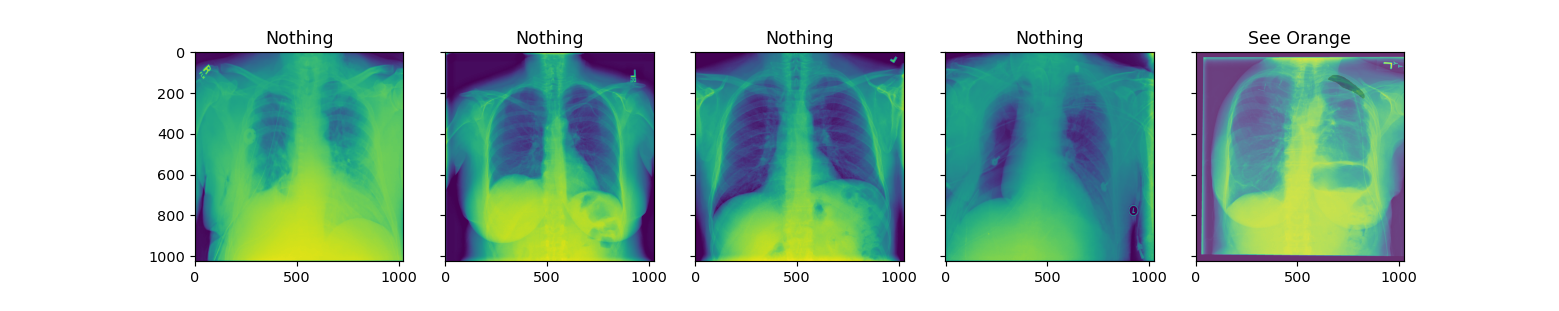

In [146]:
%matplotlib notebook
import random

# Look at a few images

n_imgs = 5

idxs = random.sample(range(len(meta_df)), n_imgs)
fig, ax = plt.subplots(nrows=1, ncols=n_imgs, sharey=True, figsize=(n_imgs*3,3))

for i, row in enumerate(meta_df.iloc[idxs].iterrows()):
    sample = pydicom.read_file(row[1].fn)
    arr = sample.pixel_array

    ax[i].imshow(arr)
    if row[1].rle_mask[0] != "-1":
        mask = mask_functions.rle2mask(row[1].rle_mask[0], 1024, 1024).T
        ax[i].imshow(mask, alpha=0.2, cmap="Oranges")
        ax[i].set_title("See Orange")
    else:
        ax[i].set_title("Nothing")

<IPython.core.display.Javascript object>


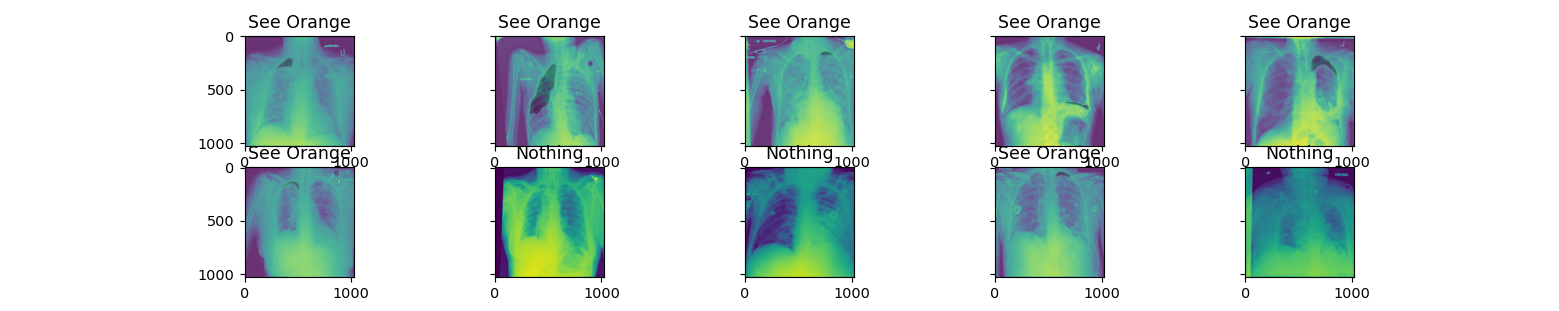

In [151]:
# look at a few from the front and back

%matplotlib notebook
import random

# Look at a few images

n_imgs = 5

fig, ax = plt.subplots(nrows=2, ncols=n_imgs, sharey=True, figsize=(n_imgs*3,3))

# Look at PA
for i, row in enumerate(meta_df[meta_df["View Position"]=="PA"].iterrows()):
    sample = pydicom.read_file(row[1].fn)
    arr = sample.pixel_array

    ax[0][i].imshow(arr)
    if row[1].rle_mask[0] != "-1":
        mask = mask_functions.rle2mask(row[1].rle_mask[0], 1024, 1024).T
        ax[0][i].imshow(mask, alpha=0.2, cmap="Oranges")
        ax[0][i].set_title("See Orange")
    else:
        ax[0][i].set_title("Nothing")
        
    if i == 4: #lol
        break
        
# Look at AP
for i, row in enumerate(meta_df[meta_df["View Position"]=="AP"].iterrows()):
    sample = pydicom.read_file(row[1].fn)
    arr = sample.pixel_array

    ax[1][i].imshow(arr)
    if row[1].rle_mask[0] != "-1":
        mask = mask_functions.rle2mask(row[1].rle_mask[0], 1024, 1024).T
        ax[1][i].imshow(mask, alpha=0.2, cmap="Oranges")
        ax[1][i].set_title("See Orange")
    else:
        ax[1][i].set_title("Nothing")
        
    if i == 4: #lol
        break

In [ ]:
# View what's happening with multiple masks

## Inspect multiple masks

In [183]:
meta_df["mask_count"].value_counts()

1     11423
2       447
3       112
0        42
4        40
5        18
6         3
8         2
7         1
10        1
Name: mask_count, dtype: int64

<IPython.core.display.Javascript object>


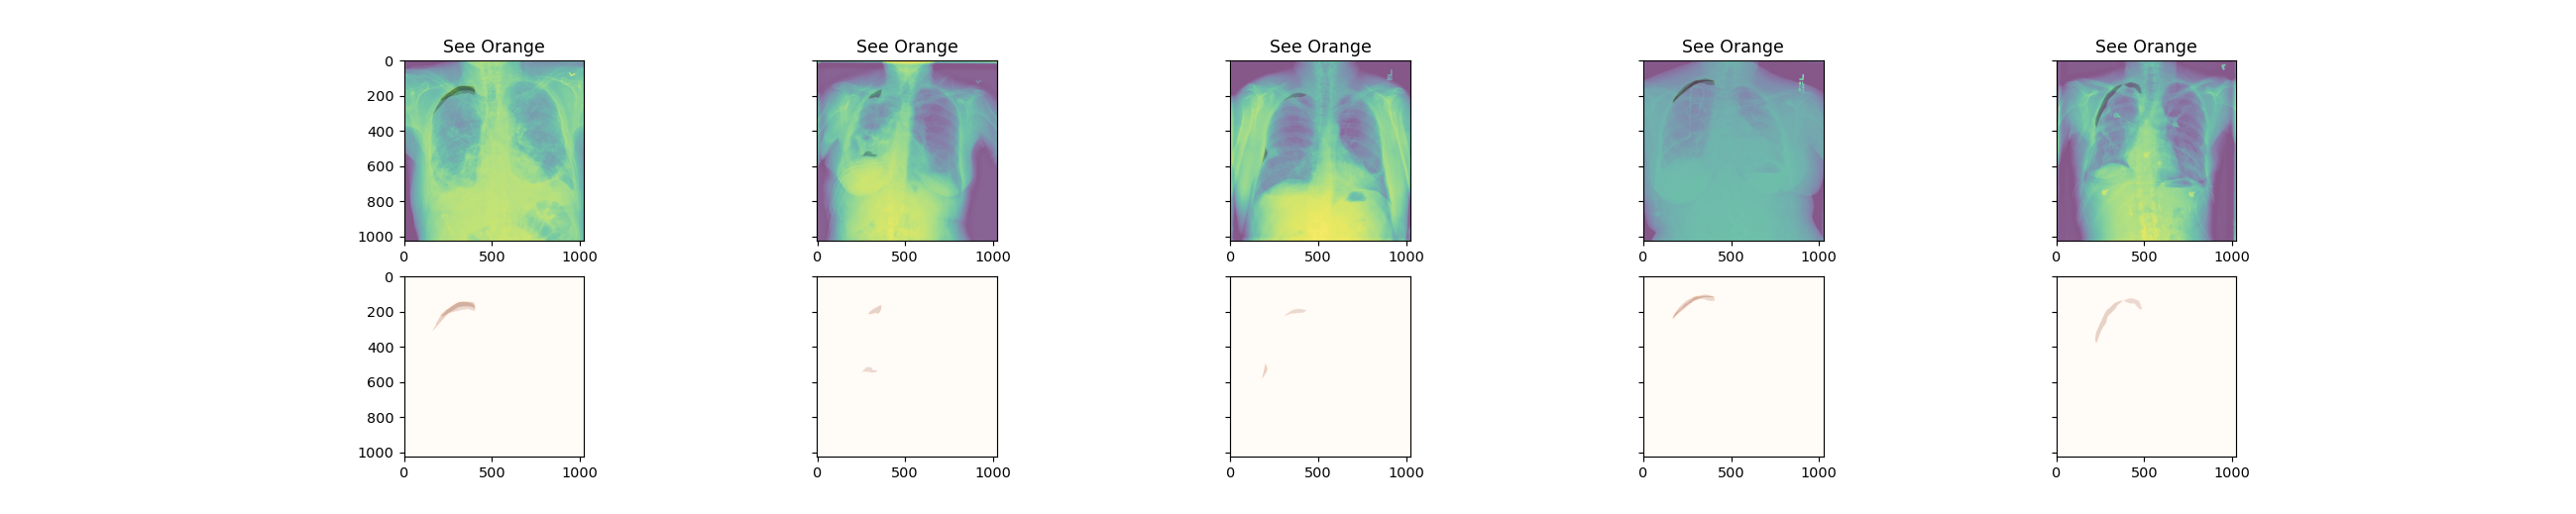

In [182]:
# inspect 2 masks

n_imgs = 5

fig, ax = plt.subplots(nrows=2, ncols=n_imgs, sharey=True, figsize=(n_imgs*5,5))

for i in range(n_imgs):
    row = meta_df[meta_df["mask_count"] == 2].sample()
    sample = pydicom.read_file(row["fn"].values[0])
    arr = sample.pixel_array

    ax[0][i].imshow(arr)
    if row["rle_mask"].values[0][0] != "-1":
        for m in row["rle_mask"].values[0]:
            mask = mask_functions.rle2mask(m, 1024, 1024).T
            ax[0][i].imshow(mask, alpha=0.2, cmap="Oranges")
            ax[1][i].imshow(mask, alpha=0.2, cmap="Oranges")
        
        ax[0][i].set_title("See Orange")
    else:
        ax[0][i].set_title("Nothing")


<IPython.core.display.Javascript object>


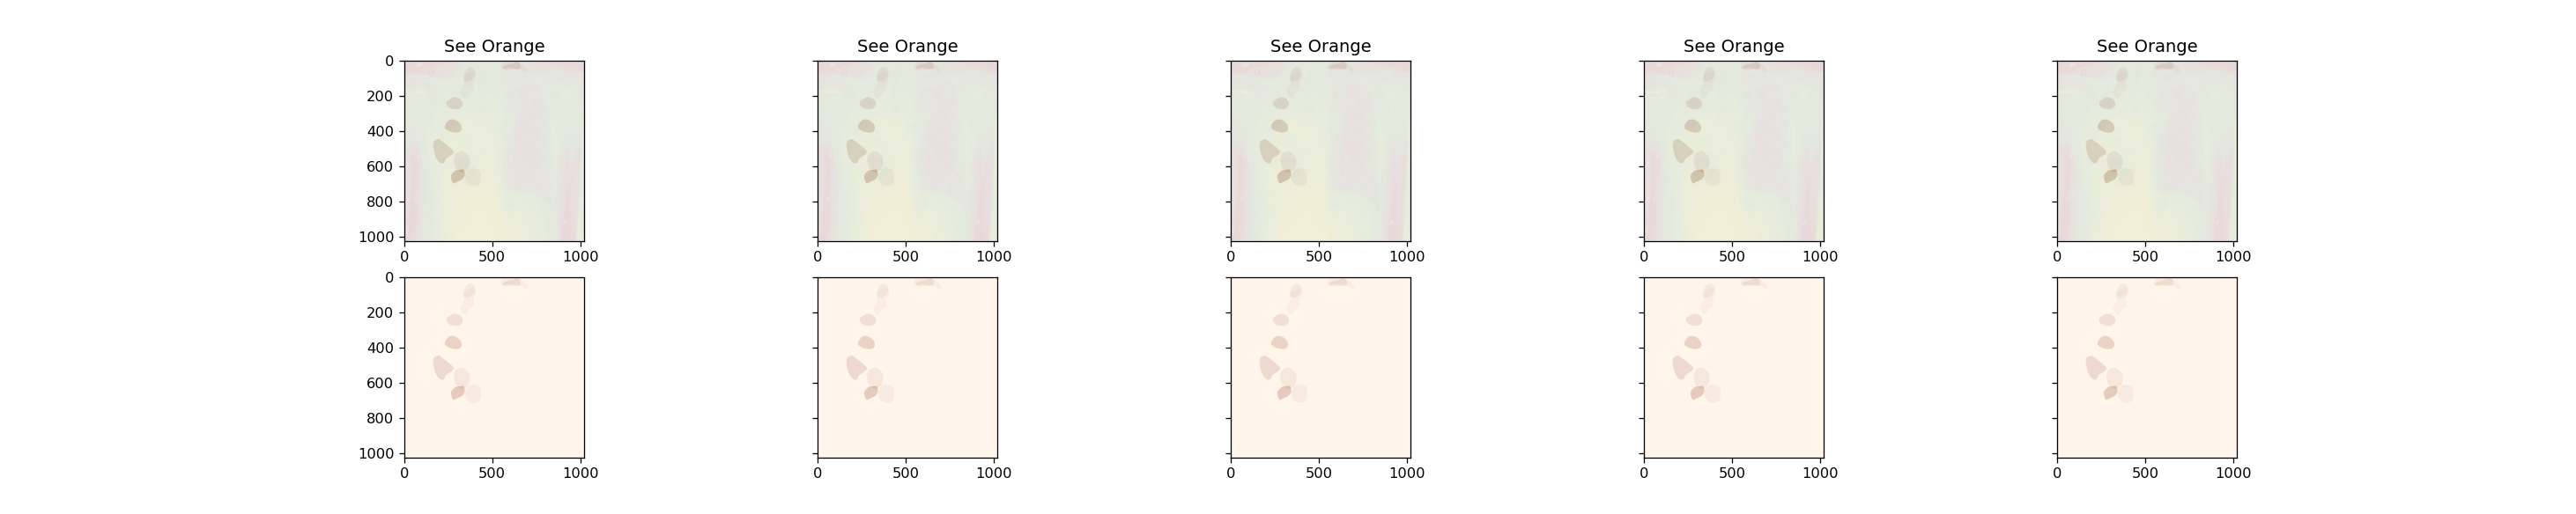

In [215]:
# inspect 10 masks

n_imgs = 5

fig, ax = plt.subplots(nrows=2, ncols=n_imgs, sharey=True, figsize=(n_imgs*5,5))

for i in range(n_imgs):
    row = meta_df[meta_df["mask_count"] == 10].sample()
    sample = pydicom.read_file(row["fn"].values[0])
    arr = sample.pixel_array

    ax[0][i].imshow(arr)
    if row["rle_mask"].values[0][0] != "-1":
        for m in row["rle_mask"].values[0]:
            mask = mask_functions.rle2mask(m, 1024, 1024).T
            ax[0][i].imshow(mask, alpha=0.2, cmap="Oranges")
            ax[1][i].imshow(mask, alpha=0.2, cmap="Oranges")
        
        ax[0][i].set_title("See Orange")
    else:
        ax[0][i].set_title("Nothing")


Looks safe to merge these segmentation areas into one area

In [271]:
# Heatmap of masks over dataset
# Need to limit to the 1000 for memory issues

sample_size = 1000
all_masks = [mask_functions.rle2mask(m, 1024, 1024).T for masks in random.sample(list(meta_df["rle_mask"].values), sample_size) for m in masks if m and m != "-1"]


<IPython.core.display.Javascript object>


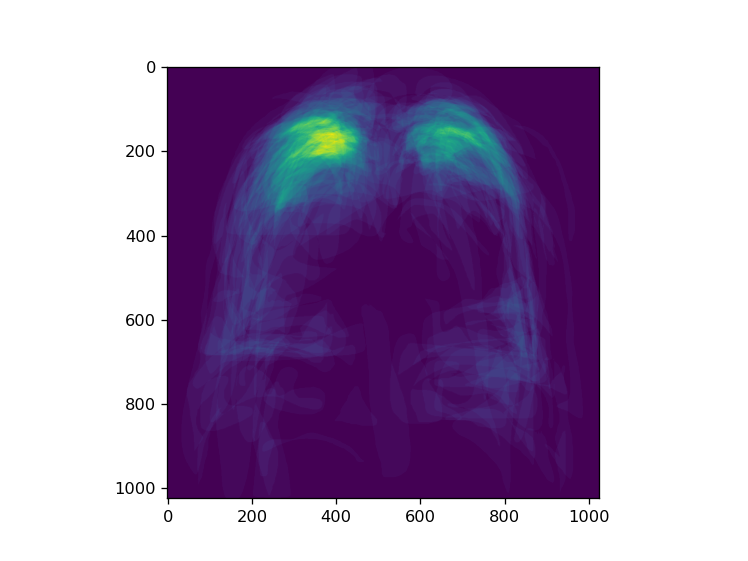

In [272]:
%matplotlib notebook
summed_masks = np.sum(np.stack(all_masks, axis=-1),axis=-1)
plt.imshow(summed_masks)
